# Part    1    ‑    Exploratory    data    analysis  

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
# import important stuff
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# import visulization modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [3]:
#read in data
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
#reset index and resample q 15 minutes
logins_df.set_index('login_time', inplace=True)
#logins_15m = pd.DataFrame(logins_df['login_time'].resample('15T').sum)

In [5]:
logins_df['count'] = 1

In [6]:
logins_15m = pd.DataFrame(logins_df['count'].resample('15T').sum())

In [7]:
#set to datetime
logins_dt = pd.to_datetime(logins_15m.index)
print(logins_dt)

DatetimeIndex(['1970-01-01 20:00:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               '1970-01-01 21:00:00', '1970-01-01 21:15:00',
               '1970-01-01 21:30:00', '1970-01-01 21:45:00',
               '1970-01-01 22:00:00', '1970-01-01 22:15:00',
               ...
               '1970-04-13 16:30:00', '1970-04-13 16:45:00',
               '1970-04-13 17:00:00', '1970-04-13 17:15:00',
               '1970-04-13 17:30:00', '1970-04-13 17:45:00',
               '1970-04-13 18:00:00', '1970-04-13 18:15:00',
               '1970-04-13 18:30:00', '1970-04-13 18:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9788, freq='15T')


In [11]:
#create lists of months and days
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

In [9]:
#add month to dataframe
logins_15m['month'] = pd.DataFrame(logins_dt.month)['login_time'].apply(lambda x: months[x-1]).tolist()

#include day, hour and weekday
logins_15m['day'] = pd.DataFrame(logins_dt.day)['login_time'].tolist()
logins_15m['hour'] = pd.DataFrame(logins_dt.hour)['login_time'].tolist()

logins_15m['weekday'] = pd.DataFrame(logins_dt.weekday)['login_time'].apply(lambda x: days[x]).tolist()

In [10]:
logins_15m.head()

,count,month,day,hour,weekday
login_time,,,,,
1970-01-01 20:00:00,2,Jan,1,20,Thur
1970-01-01 20:15:00,6,Jan,1,20,Thur
1970-01-01 20:30:00,9,Jan,1,20,Thur
1970-01-01 20:45:00,7,Jan,1,20,Thur
1970-01-01 21:00:00,1,Jan,1,21,Thur


In [11]:
# check which months are present
logins_15m['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr'], dtype=object)

In [12]:
# check for which weekdays are present
logins_15m['weekday'].unique()

array(['Thur', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

In [13]:
# check sum of logins for each month
logins_15m.groupby('month')['count'].sum()

month
Apr    13507
Feb    24673
Jan    21239
Mar    33723
Name: count, dtype: int64

## Monthly Check

In the month column we see that logins tend to happen within a 4 month time frame: Jan, Feb, Mar, Apr. It also looks like there is a steady increase in logins until April where there was a sharpe decline. Is this an indication that April is a bad business month?

In [14]:
# check how many 15 m logins per month
logins_15m['month'].value_counts()

Mar    2976
Jan    2896
Feb    2688
Apr    1228
Name: month, dtype: int64

Looks like April logins decreased to half the amount compared to Jan, Feb, and Mar. There must be another reason why April did so bad. 

(array([719171., 719185., 719199., 719213., 719227., 719241., 719255.,
        719269.]), <a list of 8 Text xticklabel objects>)

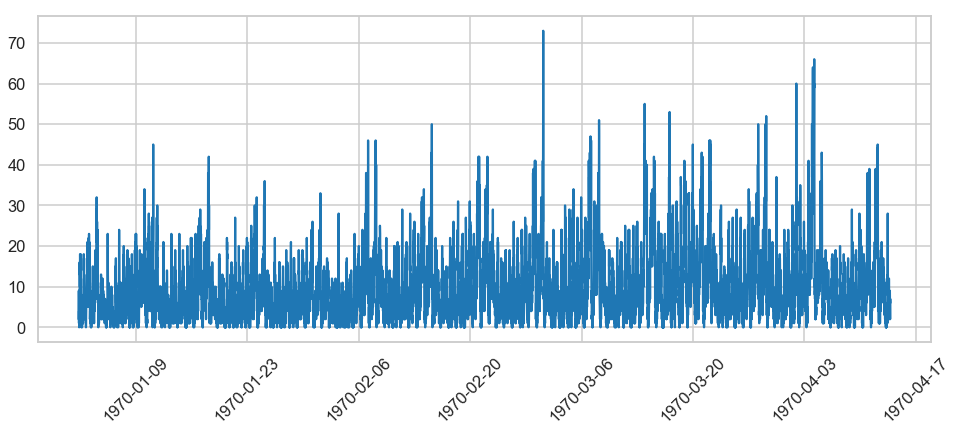

In [15]:
#graph of monthly
plt.figure(figsize=(16,6))
plt.plot(logins_15m['count'])
plt.xticks(rotation=45)

Visual check of monthly count shows that the month of April's data was cut short compared to the other months. With this, we can't deduce overall logins by looking at monthly count.

In [16]:
# check sum of logins for each day to find patter
logins_15m.groupby('weekday')['count'].sum()

weekday
Fri     15208
Mon      8823
Sat     19377
Sun     18167
Thur    11960
Tue      9268
Wed     10339
Name: count, dtype: int64

This is interesting. Looks like there's a gradual increase starting on Monday where Saturday has the max sum of logins.

In [17]:
#check count of each day
logins_15m['weekday'].value_counts()

Sat     1440
Sun     1440
Fri     1440
Mon     1420
Thur    1360
Tue     1344
Wed     1344
Name: weekday, dtype: int64

Looks like the weekend has the same about of logins. Interestingly Tuesday and Wednesday has the same amount as well. So we know that the month of April was cut short, this can also affect our weekday data as well. With that, we'll look at the average login per day for each month instead. 

In [18]:
# calculate average logins per day for each month 
logins_15m.groupby('month')['count'].sum() / logins_15m.groupby('month')['day'].nunique()

month
Apr    1039.000000
Feb     881.178571
Jan     685.129032
Mar    1087.838710
dtype: float64

This is a better representation of the data. We see a gradual increase in logins per month. Now we'll focus on each weekday per month to view any pattern in user login.

In [19]:
# define a function to separate weekend from weekday for distinction in graph

def trends(df, title):

    for day in sorted(list(df['weekday'].unique())):

        temp = df[df['weekday'] == day]
        
        # Blue for weekday
        if day in ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']:
            color = 'blue'
        # Red for weekend 
        else:
            color = 'red'
        plt.plot(temp['count'],'.', color=color)
        plt.title(title)
        plt.xticks(rotation=45)
        plt.ylim([0,75])

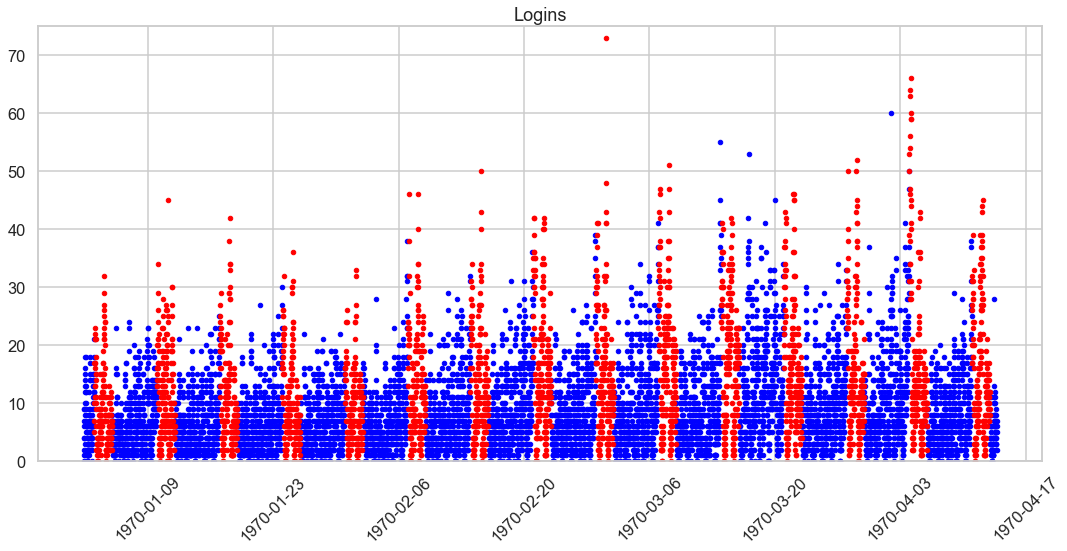

In [20]:
plt.figure(figsize=(18,8))
trends(logins_15m, 'Logins')

Logins seem to spike every weekend during the 4 months. Looks like the biggest spike is in early April. (Wonder what happened during this month to cause such a spike) Interestingly in mid-March we see a constant login throughout te week from one weekend to the next.

## Hourly Check

Text(0,0.5,'Login Sum')

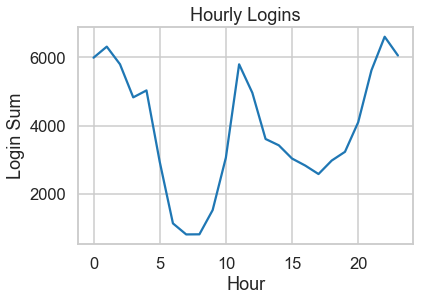

In [22]:
# plot hourly logins
plt.plot(pd.DataFrame(logins_15m.groupby('hour')['count'].sum()),'-')
plt.title('Hourly Logins')
plt.xlabel('Hour')
plt.ylabel('Login Sum')

View of hourly logins is pretty interesting. There are three spikes. Looks like there's a spike around midnight, between 10 am to 1 pm and after midnight. Next we'll check how this looks between weekend and weekday.

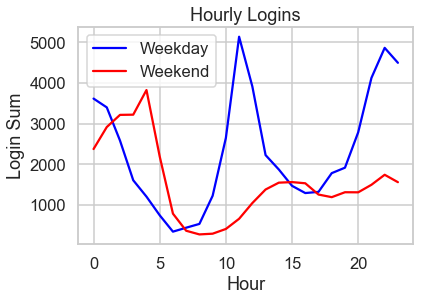

In [24]:
# set weekday and weekend df
logins_weekday = logins_15m[logins_15m['weekday'].isin(['Mon', 'Tue', 'Wed', 'Thur', 'Fri'])]
logins_weekend = logins_15m[logins_15m['weekday'].isin(['Sat', 'Sun'])]

plt.plot(pd.DataFrame(logins_weekday.groupby('hour')['count'].sum()),'b', label='Weekday')
plt.plot(pd.DataFrame(logins_weekend.groupby('hour')['count'].sum()),'r', label='Weekend')
plt.title('Hourly Logins')
plt.xlabel('Hour')
plt.ylabel('Login Sum')
plt.legend()

The break down of the hourly logins reveal that the distinction between the three spikes. During the weekend, most logins take place really early in the morning. During the weekdays, there's a a huge spike around lunch time then another one around midnight. 

# Part 2 ‑ Experiment and metrics design  

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.  

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?  
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:   
    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the observation
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Answer to #1

Key measure of success: percentage of time spent in each city 
Why: goal is to encourage driver partners to be available in both cities. To check this availability, it is necessary to know how much time is spent in each city to prove equal availability. Current state is 100% in one city and 0% time spent in the other city. As more driver partners become available in each city, that percentage should shift to 50/50 time spent in each city. 

## Answer to #2

### a) Experiment Implementation

The experiment offers full reimbursements to all toll costs, and will be tested during two times of the year: 1) when it is easy to drive (summer) and 2) when it is difficult to drive (winter). For the purposes of this challenge, let's focus on a typical summer month where the experiment will be run and documented for one month.

### b) Statistical Tests

The results of the experiment will be measured with a one-tailed z-test where we test whether the average Gotham driver's time spent in Gotham is significantly below 100% and whether the average Metropolis driver's time spent in Metropolis is significantly below 100%. Or, we can also test whether time spent is significantly above 0% outside of a driver's native city. A one-tailed test is appropriate since we want to test whether the average percent of time has changed to either above 0% or below 100% (depending on the scenario we want to test as described previously). A z-test is appropriate because we can obtain a rather large sample size (easily >30) and we likely know or can find the population's standard deviation under normal operation.

### c) Interpret results and provide recommendations

For interpretation, we'll use a confidence interval. Using a 95% confidence interval, we can present our findings as: We are 95% confident that the mean percent of time the average Gotham driver spends driving in Gotham has dropped to 75% give or take 5%. This method can easily show whether the test worked and whether drivers from each city are spending more time outside of their native cities.

Profits may have dropped depending on how many drivers move between each city. It is possible that, since demand for drivers has not been increased, profits will drop because the company is now reimbursing toll expenses while not increasing revenue. This may be of lesser concern because our main goal is to incentivize drivers to operate in both cities. We may find that we incentivised too well. For example, if we are 95% confident that the mean percent of time the average Gotham driver spends driving in Gotham has dropped to 35% give or take 5%, we could see that the metric for Metropolis drivers has not moved meaningfully. In this case, we should incentivize differently since it may not always be a good thing that the metrics have move in a statistically significant way.

# Part    3    ‑    Predictive     modeling    

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?  

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.  

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice). 

In [3]:
# import the data
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()

print(df.head())
print(df.info())

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False

In [4]:
# change object date and time columns to data using pandas. 
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

## Clean data

Fill in missing values in columns 'avg_rating_by_driver', 'avg_rating_of_driver', and 'phone'. To simplify the problem, fill in the average value for the null entries for ratings and majority of entry for 'phone'.

In [5]:
# decide missing values
arbd = df['avg_rating_by_driver'].mean()
arod = df['avg_rating_of_driver'].mean()
phn = df['phone'].value_counts().reset_index().iloc[0, 0]

# fill in missing values

df['avg_rating_by_driver'].fillna(arbd, inplace=True)
df['avg_rating_of_driver'].fillna(arod, inplace=True)
df['phone'].fillna(phn, inplace=True)

# check df now: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
# define column types for easy manipulations
categorical = ['city', 'phone', 'ultimate_black_user']
dt = ['last_trip_date', 'signup_date']
numerical = df.columns.difference(categorical+dt)

                        avg_dist  avg_rating_by_driver  avg_rating_of_driver  \
avg_dist                1.000000              0.079793              0.028508   
avg_rating_by_driver    0.079793              1.000000              0.101660   
avg_rating_of_driver    0.028508              0.101660              1.000000   
avg_surge              -0.081491              0.010498             -0.021653   
surge_pct              -0.104414              0.019964             -0.003290   
trips_in_first_30_days -0.136329             -0.039097             -0.011060   
ultimate_black_user     0.032310              0.009328             -0.001916   
weekday_pct             0.101652              0.020366              0.012587   

                        avg_surge  surge_pct  trips_in_first_30_days  \
avg_dist                -0.081491  -0.104414               -0.136329   
avg_rating_by_driver     0.010498   0.019964               -0.039097   
avg_rating_of_driver    -0.021653  -0.003290               -0.0

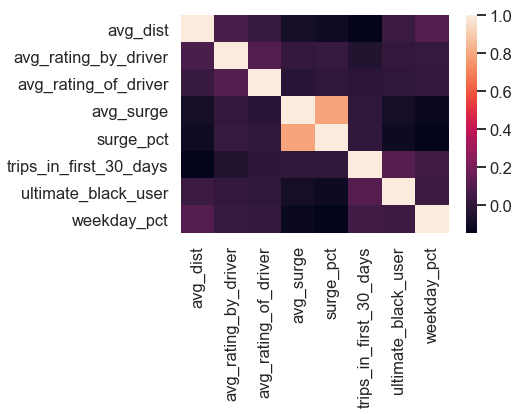

In [7]:
# Show the correlation matrix
corr_matrix = df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

We see that surge_pct and avg_surge are highly correlated with eachother at 0.79, and this makes sense given these two features are highly related to there being a surge or not. Since there are not too many features in this dataset, we will keep these two features.

In [8]:
# find the last trip date in the dataset
sorted(df['last_trip_date'].unique())[-10:]

[numpy.datetime64('2014-06-22T00:00:00.000000000'),
 numpy.datetime64('2014-06-23T00:00:00.000000000'),
 numpy.datetime64('2014-06-24T00:00:00.000000000'),
 numpy.datetime64('2014-06-25T00:00:00.000000000'),
 numpy.datetime64('2014-06-26T00:00:00.000000000'),
 numpy.datetime64('2014-06-27T00:00:00.000000000'),
 numpy.datetime64('2014-06-28T00:00:00.000000000'),
 numpy.datetime64('2014-06-29T00:00:00.000000000'),
 numpy.datetime64('2014-06-30T00:00:00.000000000'),
 numpy.datetime64('2014-07-01T00:00:00.000000000')]

In [9]:
print('{:.2f}% of users have taken a trip on or after June 1st, 2014 and are considered \'retained\'.'.format(len(df[df['last_trip_date'] >= '2014-06-01'])/len(df)*100))

37.61% of users have taken a trip on or after June 1st, 2014 and are considered 'retained'.


## Build a predictive model
To help Ultimate determine whether or not a user will be active in their 6th month on the system, we build a predictive model. I begin by creating the target variable for a binary classification of retained or not retained:

In [12]:
# Create the target feature: retained or not by checking if the user has taken a trip in the last 30 days

ls = []
deadline = datetime.strptime('2014-06-01', '%Y-%m-%d')


for date in df['last_trip_date']:
    if date >= deadline:
        ls.append(1)
    else:
        ls.append(0)
        
df['retained'] = ls

# add day of the week into the data frame as a categorical feature


ls_weekday = df['last_trip_date'].dt.weekday.apply(lambda x: days[x]).tolist()
ls_weekend = []

for i in ls_weekday:
    if i in ['Thu', 'Fri', 'Mon', 'Tue', 'Wed']:
        ls_weekend.append(0)
    else:
        ls_weekend.append(1)

df['weekend last ride'] = ls_weekend

In [13]:
print(df['retained'].value_counts())

# Drop last trip date to prepare for predictive models
df_class = df.drop(['last_trip_date', 'signup_date'], axis=1)

0    31196
1    18804
Name: retained, dtype: int64


In [14]:
df_dummy = pd.get_dummies(df_class, columns = categorical)

df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                     50000 non-null float64
avg_rating_by_driver         50000 non-null float64
avg_rating_of_driver         50000 non-null float64
avg_surge                    50000 non-null float64
surge_pct                    50000 non-null float64
trips_in_first_30_days       50000 non-null int64
weekday_pct                  50000 non-null float64
retained                     50000 non-null int64
weekend last ride            50000 non-null int64
city_Astapor                 50000 non-null uint8
city_King's Landing          50000 non-null uint8
city_Winterfell              50000 non-null uint8
phone_Android                50000 non-null uint8
phone_iPhone                 50000 non-null uint8
ultimate_black_user_False    50000 non-null uint8
ultimate_black_user_True     50000 non-null uint8
dtypes: float64(6), int64(3), uint8(7)
memory usage: 3.8 MB


In [16]:
# import stats modules
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency
from scipy.sparse import hstack

In [17]:
# import sklearn modules
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE

In [18]:
# Identify variables
X = df_dummy.drop('retained', axis=1)
y = df_dummy.retained

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=41)


rus = RandomUnderSampler(random_state=41)
X_rus, y_rus = rus.fit_sample(X=X_train, y=y_train)
X_rus_test, y_rus_test = rus.fit_sample(X=X_test, y=y_test)

print('Raw Training Set Percent Retained: {:.1f}%'.format(
    len(y_train[y_train == 1])/len(y_train)*100))
print('Resampled Training Set Percent Retained: {}%'.format(
    len(y_rus[y_rus == 1])/len(y_rus)*100))

Raw Training Set Percent Retained: 37.6%
Resampled Training Set Percent Retained: 50.0%


#### Random Forest Classifier to predict whether the user is retained or not.
Using grid search and cross validation on the train test data to optimize parameters of the random forest model.

In [19]:
#Random forest classifier parameter optimization:

rf = RandomForestClassifier()
param_grid = {"n_estimators": [50, 100, 200],
              "max_features": [1, 3, 10],
              "max_depth": [3, 10, 20]
              }

grid_rf = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_rf.fit(X_rus, y_rus)

# Printing the best score from the model
print('Best Score:', grid_rf.best_score_)

# Saving and printing the best parameters from the model
best_params = grid_rf.best_params_
print('Best Parameters:', best_params)

Best Score: 0.7645962732919255
Best Parameters: {'max_depth': 10, 'max_features': 3, 'n_estimators': 200}


In [20]:
#initiate a instance for classifier, use the best parameters found from the last step

rf = RandomForestClassifier(**best_params)

# Fit the classifier to the training data
rf.fit(X_rus, y_rus)

# Predict the labels of the test data: y_pred
y_pred = rf.predict(X_test)

scores_rf_train = cross_val_score(rf, X_rus, y_rus, cv=5)
print('Cross Validation Accuracy Scores - Training Set: {:.5f}(+/- {:.2f})'.format(scores_rf_train.mean(), 
                                                                                 scores_rf_train.std()*2))
scores_rf_test = cross_val_score(rf, X_test, y_test, cv=5)
print('Cross Validation Accuracy Scores - Test Set: {:.5f}(+/- {:.2f})'.format(scores_rf_test.mean(), 
                                                                                 scores_rf_test.std()*2))

# Generate the confusion matrix and classification report
print('Confusion matrix on the test data:')
print(confusion_matrix(y_test, y_pred))
print('Classification report on the test data:')
print(classification_report(y_test, y_pred))

Cross Validation Accuracy Scores - Training Set: 0.76486(+/- 0.03)
Cross Validation Accuracy Scores - Test Set: 0.78377(+/- 0.01)
Confusion matrix on the test data:
[[17067  4764]
 [ 3297  9872]]
Classification report on the test data:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     21831
           1       0.67      0.75      0.71     13169

   micro avg       0.77      0.77      0.77     35000
   macro avg       0.76      0.77      0.76     35000
weighted avg       0.78      0.77      0.77     35000



The random forest gives an accuracy of 0.78. It does a fairly good job of determining the difference between a retained and not retained user as shown by the confusion matrix. Now let's check which features are more important determining the target feature using the random forest classifier.

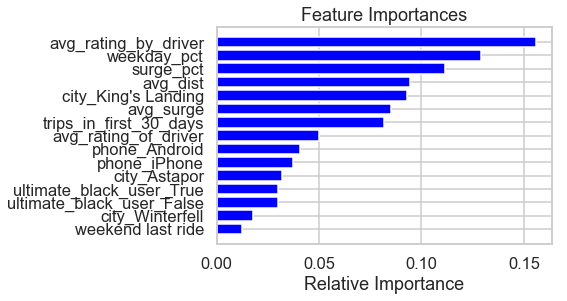

In [21]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

As shown above, the top three determining features are "ave_rating_by_driver", "weekday_pct", and "surge_pct". These features are first features to consider if the company wants to improve user activity.